In [ ]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Dropbox/MSBA/Data Analytics Programming/chicago_crimes.csv')

In [ ]:
type_counts = data['Primary Type'].value_counts()
type_counts

In [448]:
year10 = data[data['Year']==2010]
vc10 = year10['Primary Type'].count()
#print vc10 # total value counts by type for 2010

pop_2010 = pd.read_csv('Pop_by_police_district_2010.csv')
p = pop_2010['Fraction']
#print p

arr10 = year10[year10['Arrest']==True]['Arrest'].count()
#print arr10

mystery10 = year10[year10['Arrest']==False]['Arrest'].count()
#print mystery10

dist2010count={}
ctot = []
s = []
u = []

# overall fraction
for c in range(1,26):
        mask = year10[year10['District'] == c]
        dist2010count[c] = mask['Primary Type'].count()
        #print "District", c
        #print dist2010count[c] 
        ctot.append(round(dist2010count[c]/float(vc10),3))
        arrest = mask[mask['Arrest']==True]['Arrest'].count()
        mystery = mask[mask['Arrest']==False]['Arrest'].count()
        s.append(arrest/float(arr10))
        u.append(mystery/float(mystery10))

#print "\n"
#print x
#print y

popDict = {}

for key, value in dist2010count.items():
    dist2010count[key] = [p[key-1],ctot[key-1],s[key-1], u[key-1]]
    popDict[key] = [p[key-1],ctot[key-1]]
    
print dist2010count


{1: [0.021000000000000001, 0.025, 0.017171717171717171, 0.027181688125894134], 2: [0.013999999999999999, 0.042, 0.039393939393939391, 0.043276108726752506], 3: [0.027999999999999997, 0.055, 0.059595959595959598, 0.053648068669527899], 4: [0.045999999999999999, 0.057, 0.033333333333333333, 0.064735336194563661], 5: [0.027999999999999997, 0.045, 0.047474747474747475, 0.043991416309012876], 6: [0.034000000000000002, 0.063, 0.061616161616161617, 0.063662374821173109], 7: [0.026000000000000002, 0.058, 0.052525252525252523, 0.059728183118741056], 8: [0.091999999999999998, 0.078, 0.082828282828282834, 0.075822603719599424], 9: [0.057999999999999996, 0.048, 0.061616161616161617, 0.043633762517882688], 10: [0.044000000000000004, 0.046, 0.052525252525252523, 0.044349070100143065], 11: [0.026000000000000002, 0.062, 0.09494949494949495, 0.050786838340486411], 12: [0.026000000000000002, 0.044, 0.038383838383838381, 0.046137339055793994], 13: [0.022000000000000002, 0.0, 0.0, 0.0], 14: [0.04400000000

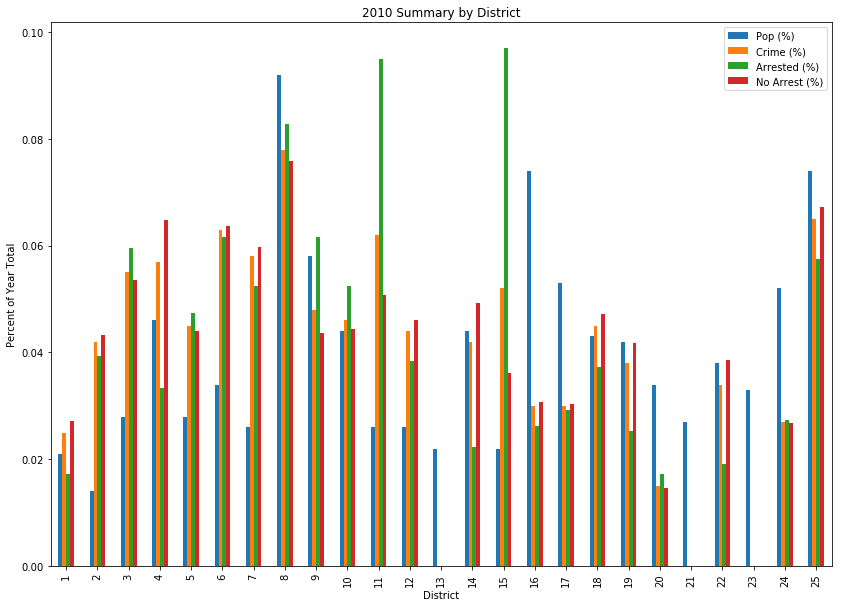

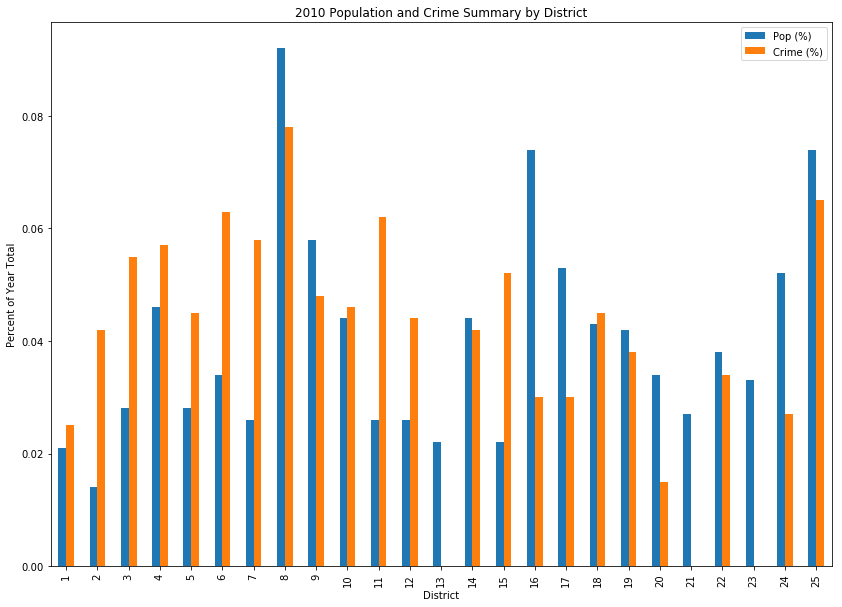

In [397]:
pylab.rcParams['figure.figsize'] = (14, 10)
df_pop = pd.DataFrame.from_dict(dist2010count, orient='index')
df_pop.columns=['Pop (%)','Crime (%)','Arrested (%)','No Arrest (%)']
df_pop
df_pop.plot.bar()
xlabel('District')
ylabel('Percent of Year Total')
title('2010 Summary by District')
#df_pop.plot.bar(stacked=True)

# District 8 most populated and had most crime


df_p = pd.DataFrame.from_dict(popDict, orient='index')
df_p.columns=['Pop (%)','Crime (%)']
df_p
df_p.plot.bar()
xlabel('District')
ylabel('Percent of Year Total')
title('2010 Population and Crime Summary by District')


df_p = pd.DataFrame.from_dict(popDict, orient='index')
df_p.columns=['Pop (%)','Crime (%)']
df_p
df_p.plot.bar()
xlabel('District')
ylabel('Percent of Year Total')
title('2010 Population and Crime Summary by District')





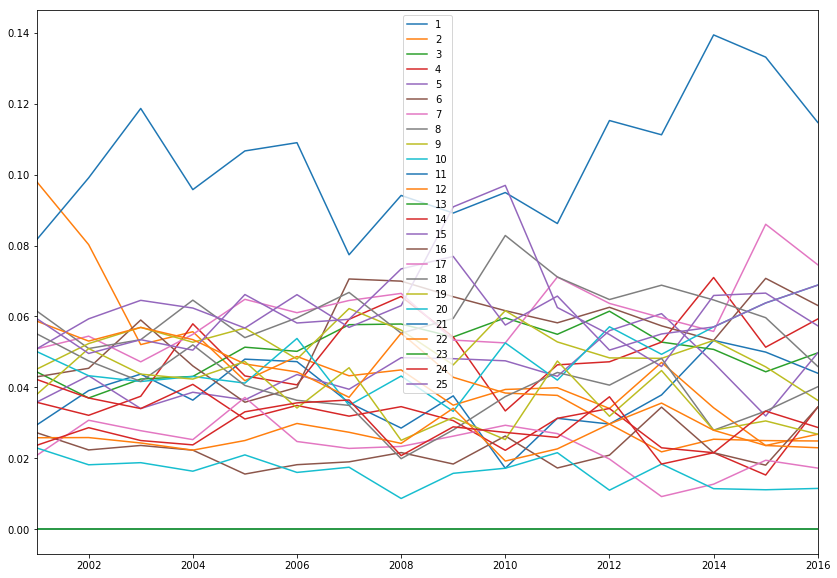

In [394]:
# murders by district per year

yearDict = {}
a = []

for y in range(2001,2017):
    mask = data[data['Year'] == y]
    arrest = mask[mask['Arrest']==True]['Arrest'].count()
    a.append(arrest)
    ar = []
    for d in range(1,26):
        mask2 = mask[mask['District'] == d]
        count= mask2[mask2['Arrest']==True]['Arrest'].count()

        fraction = float(count)/(a[y-2001])
        ar.append(fraction)
    yearDict[y]= ar

df_year = pd.DataFrame.from_dict(yearDict, orient='index')
df_year = df_year.sort_index()
df_year2 = df_year.T
df_year2.index = df_year2.index + 1
df_year = df_year2.T
df_year.plot()


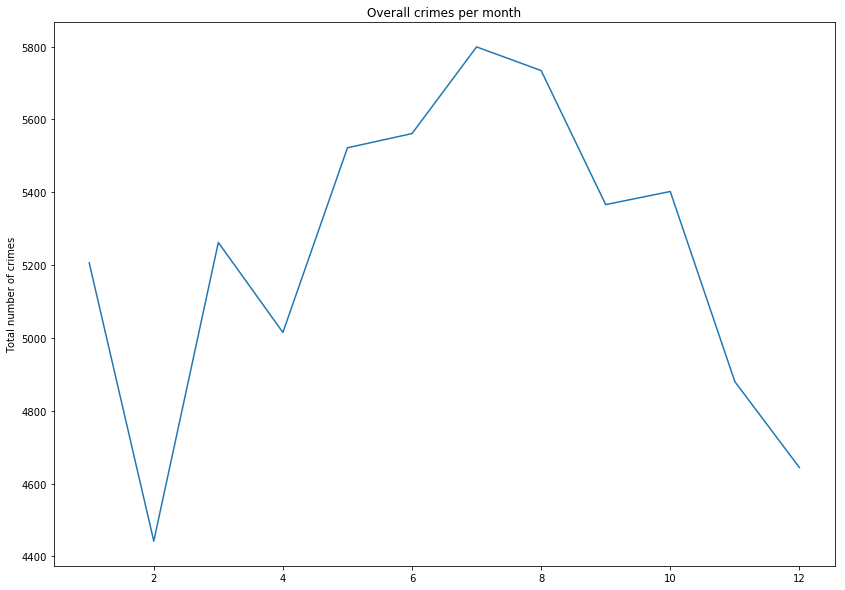

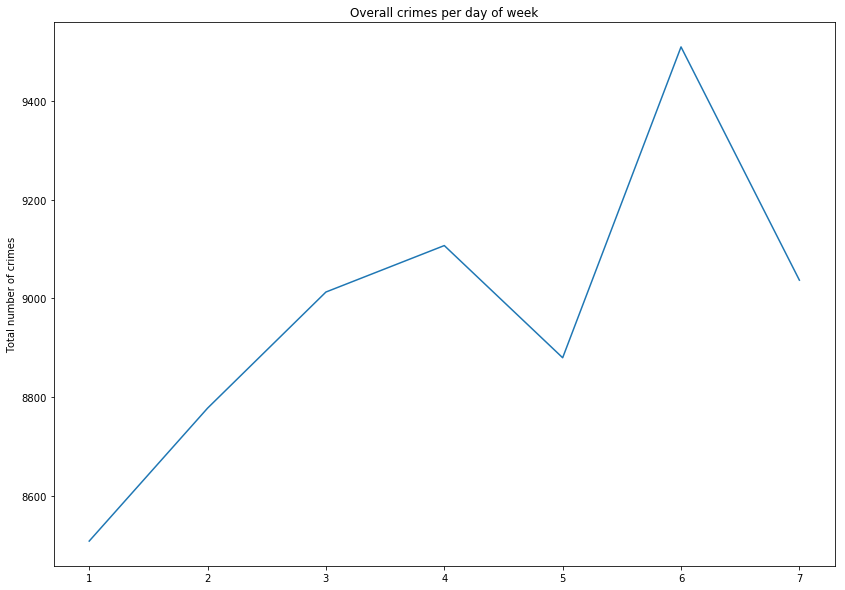

In [358]:
# Time of year
time = data[['Month','Weekday','Time','Primary Type','Arrest','District','Year']]
# grps = months.groupby(['Month','Year'])['Primary Type'].count()
months = time.groupby(['Month'])['Primary Type'].count()
plt.plot(months)
ylabel("Total number of crimes")
title("Overall crimes per month")
# plt.locator_params(numticks=12)
plt.show()

day = time.groupby('Weekday')
days = time.groupby(['Weekday'])['Primary Type'].count()
plt.plot(days)
ylabel("Total number of crimes")
title("Overall crimes per day of week")
# plt.locator_params(numticks=7)
plt.show()


# distday = {}
# l = []

# for d in range(1,26):
#         mask = day[day['District'] == d]
#         l.append(mask['Month'].value_counts())
#         distday[d] = l[d]





In [416]:
grouped = data.groupby(['District', 'Weekday'])['Primary Type'].count()
df = grouped.unstack()
df.index = df.index.map(int)
df.sort_index(inplace=True)
#df.T.plot()

In [ ]:


data2 = pd.DataFrame.copy(data)
data2['Date']=pd.to_datetime(data2.Date)
data2.index = data2['Date']
dfDate = data2.sort_index()
#print dfDate
overTime = dfDate.groupby(['Month','Year'])['Primary Type'].count()
#print overTime

In [ ]:
group_date = data.groupby(['District','Year'])['Primary Type'].count()
#group_date

In [421]:
dist8 = data[data['District']==8]
dist11 = data[data['District']==11]
dist25 = data[data['District']==25]
subdf = [dist8,dist11,dist25]
top3 = pd.concat(subdf)
top3

,Unnamed: 0,ID,Case Number,Date,Time,Month,Weekday,Block,IUCR,Primary Type,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2001-10-08,1300305,1788707,G603766,2001-10-08,11:00:00 AM,10,2,070XX S ARTESIAN AV,930,MOTOR VEHICLE THEFT,...,NaN,NaN,7,1161300.0,1857829.0,2001,8/17/15 15:03,41.765561,-87.684344,"(41.765561, -87.684344)"
2002-09-13,573868,2366040,HH647685,2002-09-13,1:30:00 PM,9,6,054XX S NEW ENGLAND AVE,1320,CRIMINAL DAMAGE,...,23.0,56.0,14,1131306.0,1867778.0,2002,4/15/16 8:55,41.793431,-87.794055,"(41.793431, -87.794055)"
2006-04-28,3297071,4713512,HM318514,2006-04-28,5:25:24 PM,4,6,025XX W 66TH ST,486,BATTERY,...,15.0,66.0,08B,1160722.0,1860811.0,2006,4/15/16 8:55,41.773756,-87.686380,"(41.773756, -87.68638)"
2009-06-10,2013218,6966394,HR368644,2009-06-10,11:00:00 AM,6,4,076XX S CICERO AVE,910,MOTOR VEHICLE THEFT,...,13.0,65.0,7,1145727.0,1853720.0,2009,2/4/16 6:33,41.754593,-87.741529,"(41.754593, -87.741529)"
2002-09-14,6243350,2391144,HH675875,2002-09-14,5:00:00 PM,9,7,058XX W 63RD ST,820,THEFT,...,13.0,64.0,6,1138343.0,1862172.0,2002,4/15/16 8:55,41.777923,-87.768386,"(41.777923, -87.768386)"
2010-02-18,2345136,7395950,HS170723,2010-02-18,1:15:00 PM,2,5,059XX S SPAULDING AVE,2012,NARCOTICS,...,16.0,66.0,18,1155414.0,1864857.0,2010,2/4/16 6:33,41.784966,-87.705730,"(41.784966, -87.70573)"
2008-12-26,3464880,6677473,HP751895,2008-12-26,7:17:47 PM,12,6,039XX W 55TH ST,031A,ROBBERY,...,23.0,62.0,3,1150825.0,1867829.0,2008,2/4/16 6:33,41.793213,-87.722478,"(41.793213, -87.722478)"
2002-09-24,573510,2365572,HH668605,2002-09-24,2:30:00 AM,9,3,055XX S HOMAN AVE,915,MOTOR VEHICLE THEFT,...,14.0,63.0,7,1154654.0,1867727.0,2002,4/15/16 8:55,41.792857,-87.708440,"(41.792857, -87.70844)"
2012-09-01,3977710,8783131,HV456611,2012-09-01,10:49:00 AM,9,7,056XX S ARTESIAN AVE,610,BURGLARY,...,16.0,63.0,5,1160991.0,1867206.0,2012,2/4/16 6:33,41.791299,-87.685218,"(41.791299, -87.685218)"


In [422]:
top3copy = pd.DataFrame.copy(top3)
top3copy['Date']=pd.to_datetime(top3copy.Date)
top3copy.index = top3copy['Date']
dfDate3 = top3copy.sort_index()
#print dfDate
overTime = dfDate3.groupby(['Month','Year'])['Primary Type'].count()
#print overTime

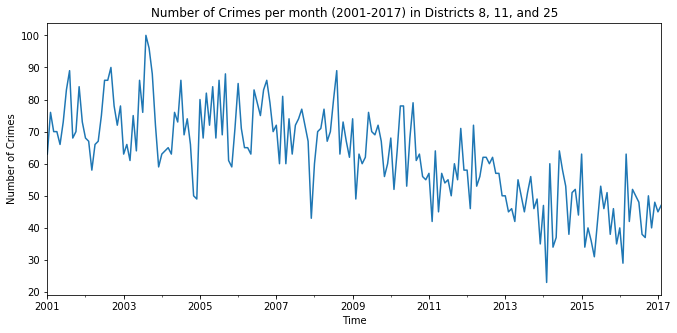

In [423]:
top3copy.index = pd.DatetimeIndex(top3copy.Date)
plt.figure(figsize=(11,5))
top3copy.resample('M').size().plot(legend=False)
plt.title('Number of Crimes per month (2001-2017) in Districts 8, 11, and 25')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.show()

In [415]:
data2 = pd.DataFrame.copy(data)
data2['Date']=pd.to_datetime(data2.Date)
data2.index = data2['Date']
dfDate = data2.sort_index()
#print dfDate
overTime = dfDate.groupby(['Month','Year'])['Primary Type'].count()
#print overTime

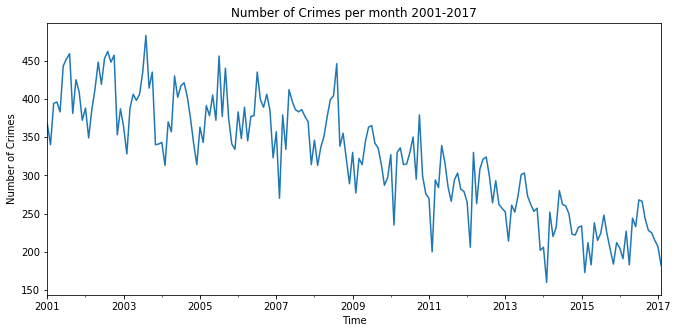

In [413]:
data2.index = pd.DatetimeIndex(data2.Date)
plt.figure(figsize=(11,5))
data2.resample('M').size().plot(legend=False)
plt.title('Number of Crimes per month 2001-2017')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.show()

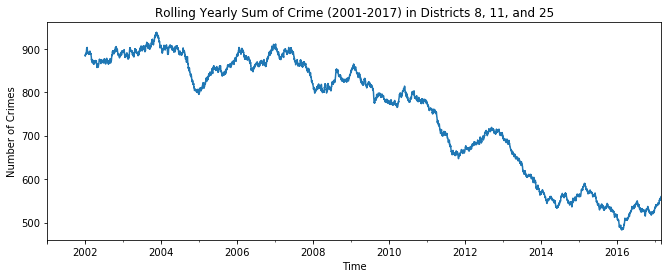

In [446]:
plt.figure(figsize=(11,4))
top3copy.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling Yearly Sum of Crime (2001-2017) in Districts 8, 11, and 25')
plt.ylabel('Number of Crimes')
plt.xlabel('Time')
plt.show()

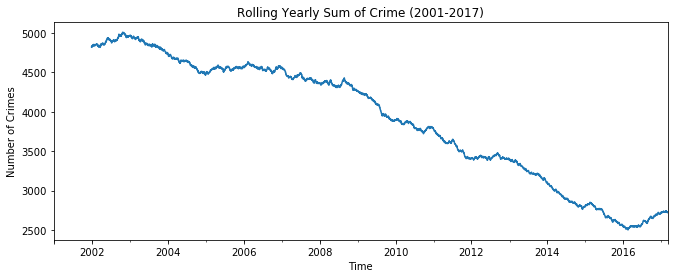

In [406]:
plt.figure(figsize=(11,4))
data2.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling Yearly Sum of Crime (2001-2017)')
plt.ylabel('Number of Crimes')
plt.xlabel('Time')
plt.show()

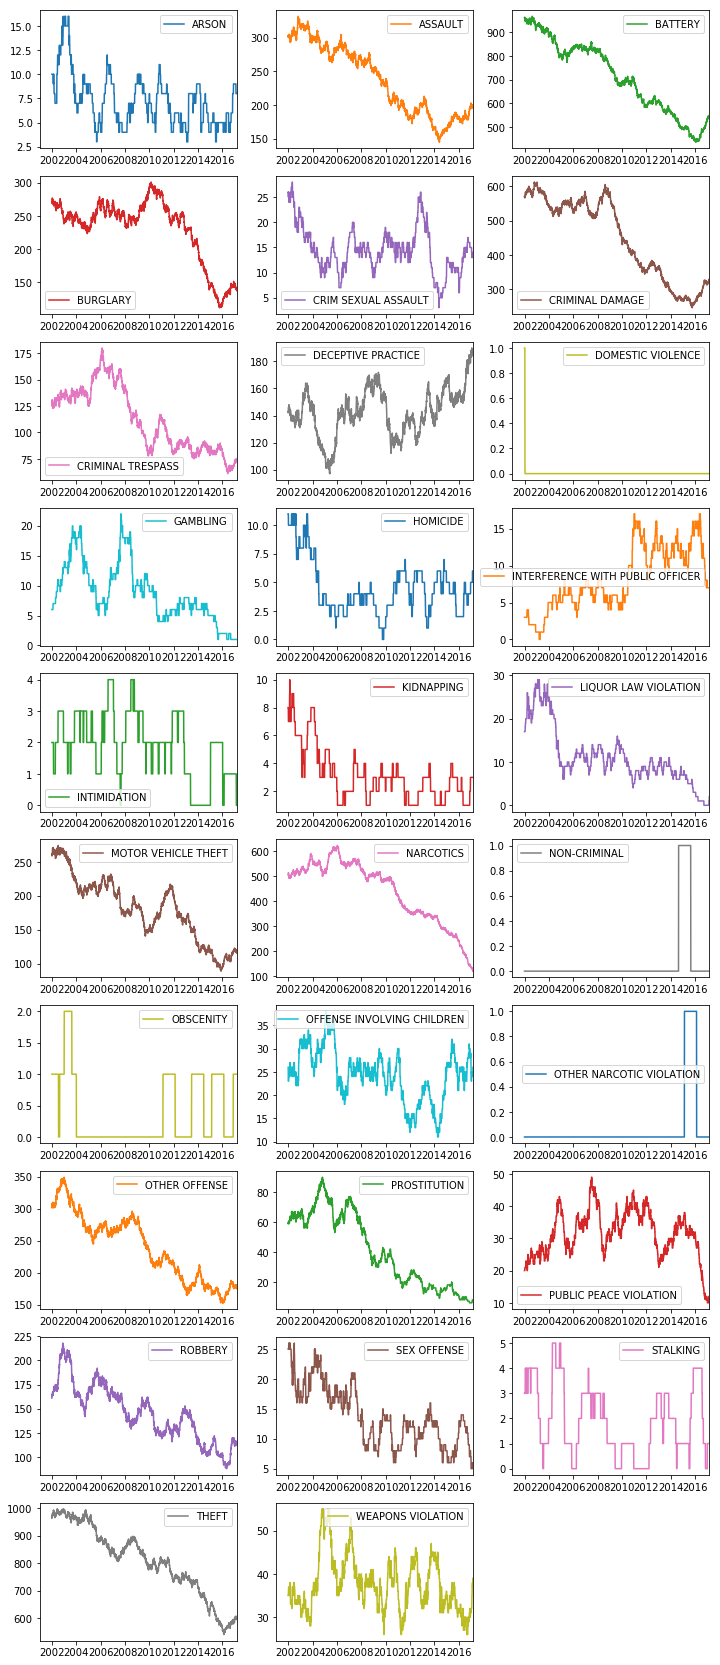

In [442]:
#### ALL DISTRICTS


crimes_count_date = data2.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data2.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

# Crime has recently gone up again in a lot of categories
# categories that haven't recently gone up: public peace violation, narcotics
# gambling, interference with public peace officer, liquor law violation, prostitution

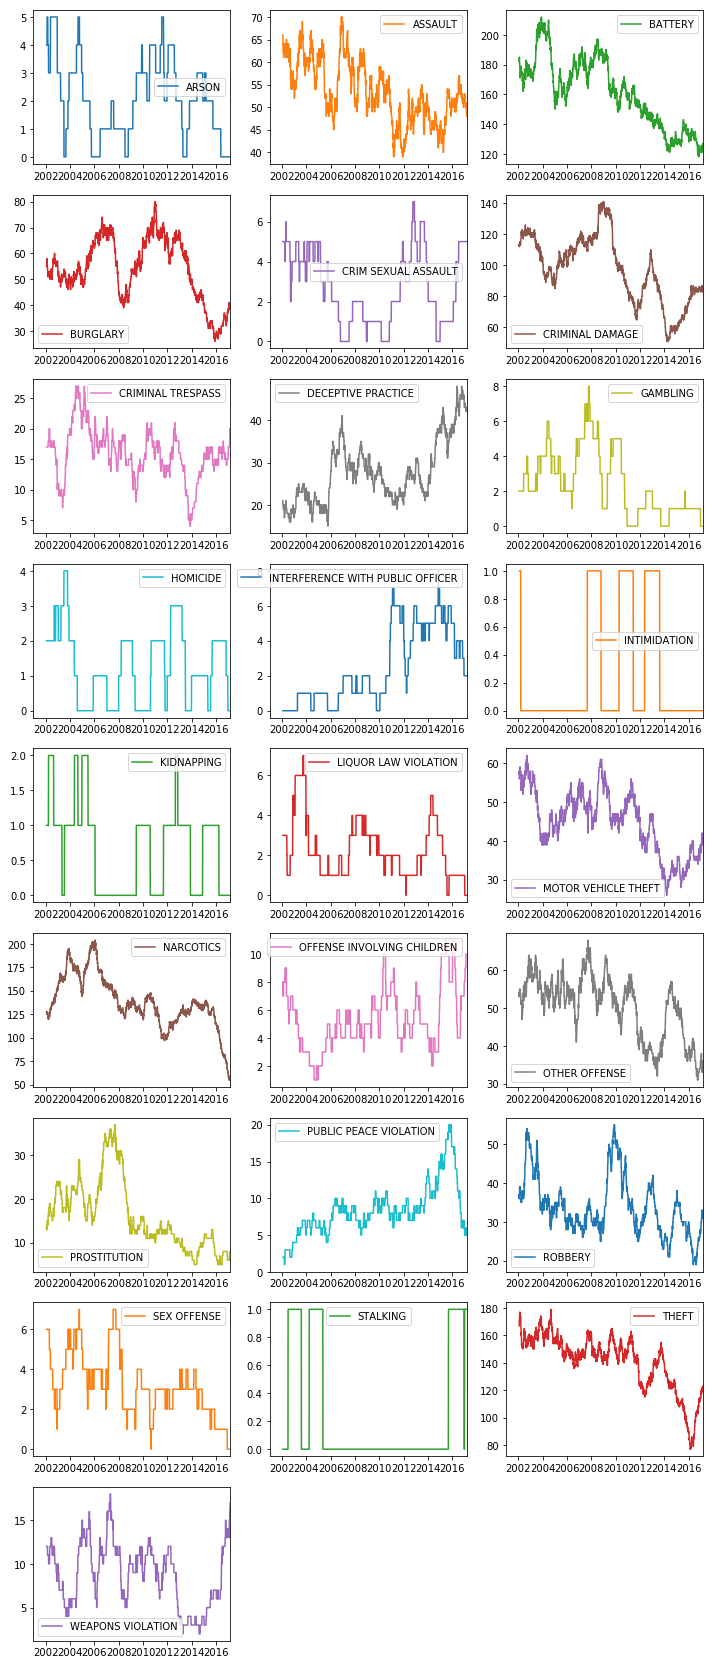

In [445]:
### DISTRICT 8, 11, and 25

top3copy.index = pd.DatetimeIndex(top3copy.Date)


crimes_count_date = top3copy.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=top3copy.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)


# mask1 = top3copy[top3copy['Primary Type']=='BATTERY']
# mask3 = top3copy[top3copy['Primary Type']=='NARCOTICS']
# mask3 = top3copy[top3copy['Primary Type']=='THEFT']
# masks = [mask1,mask2,mask3]
# top3dc = pd.concat(masks)

# print top3dc

# top3dc.index = pd.DatetimeIndex(top3dc.Date)


# crimes_count_date = top3dc.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=top3dc.index.date, fill_value=0)
# crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
# plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)



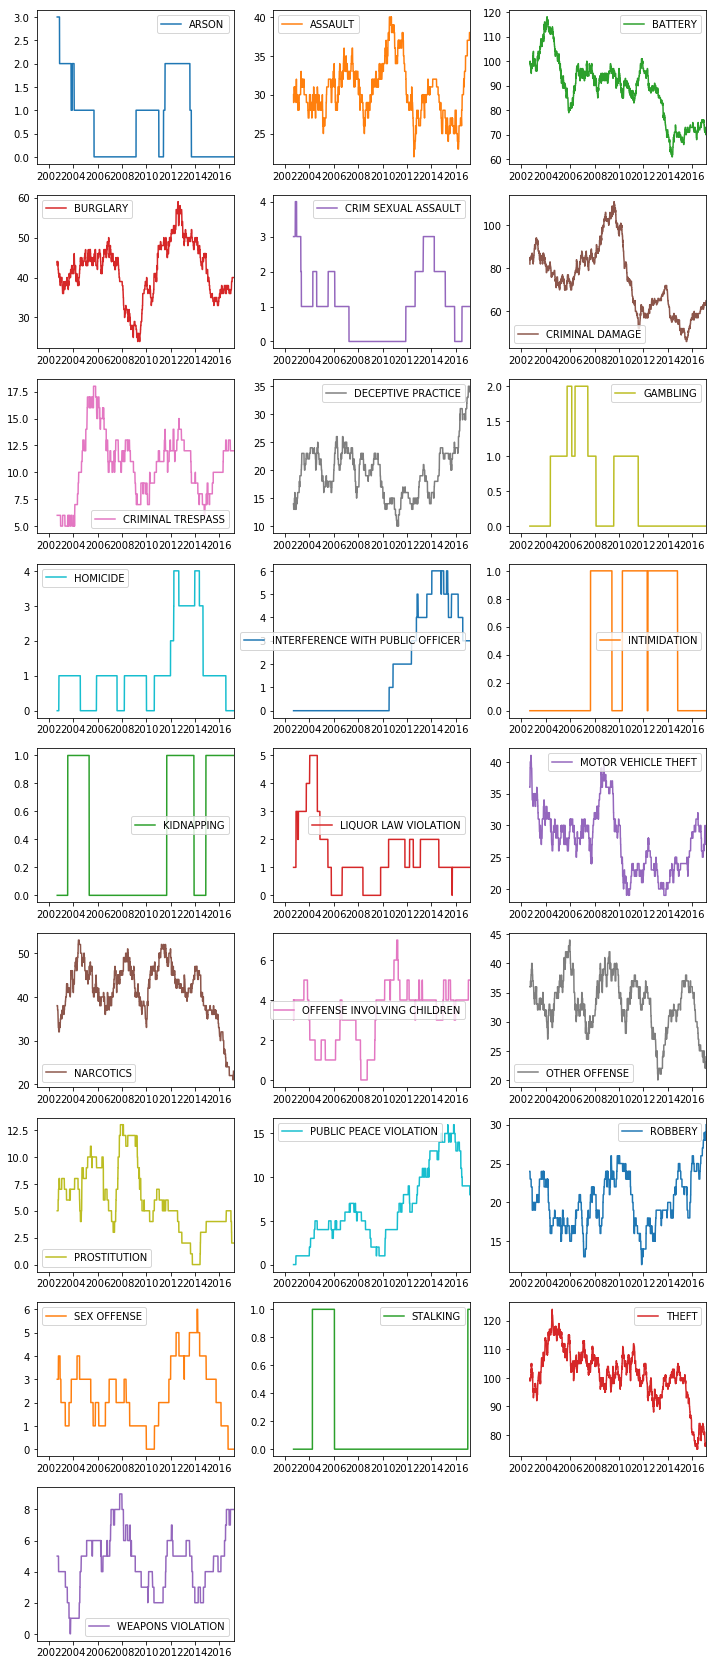

In [425]:
#### DISTRICT 8
dist8.index = pd.DatetimeIndex(dist8.Date)

crimes_count_date = dist8.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=dist8.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)


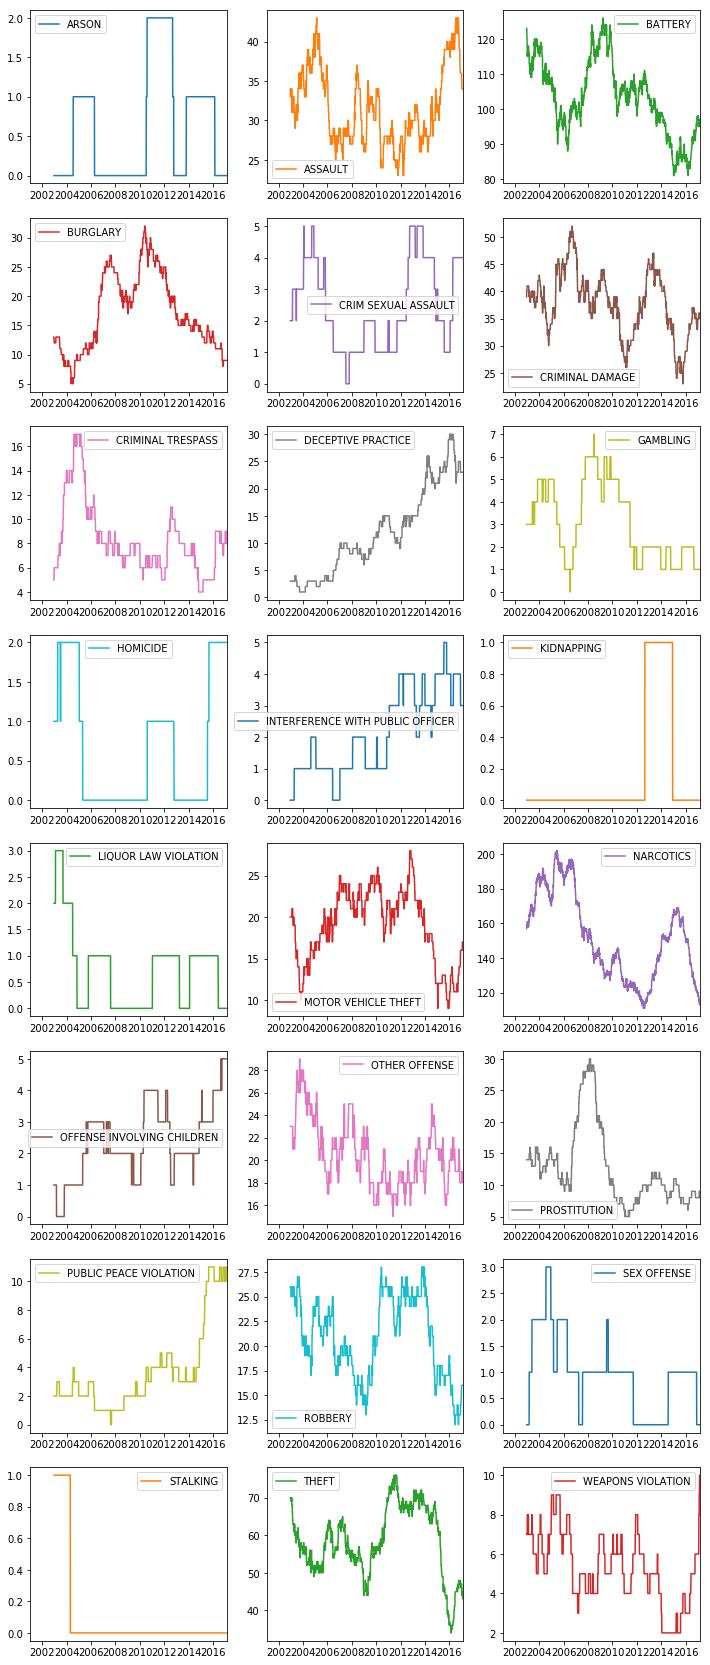

In [426]:
#### DISTRICT 11

dist11.index = pd.DatetimeIndex(dist11.Date)


crimes_count_date = dist11.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=dist11.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)



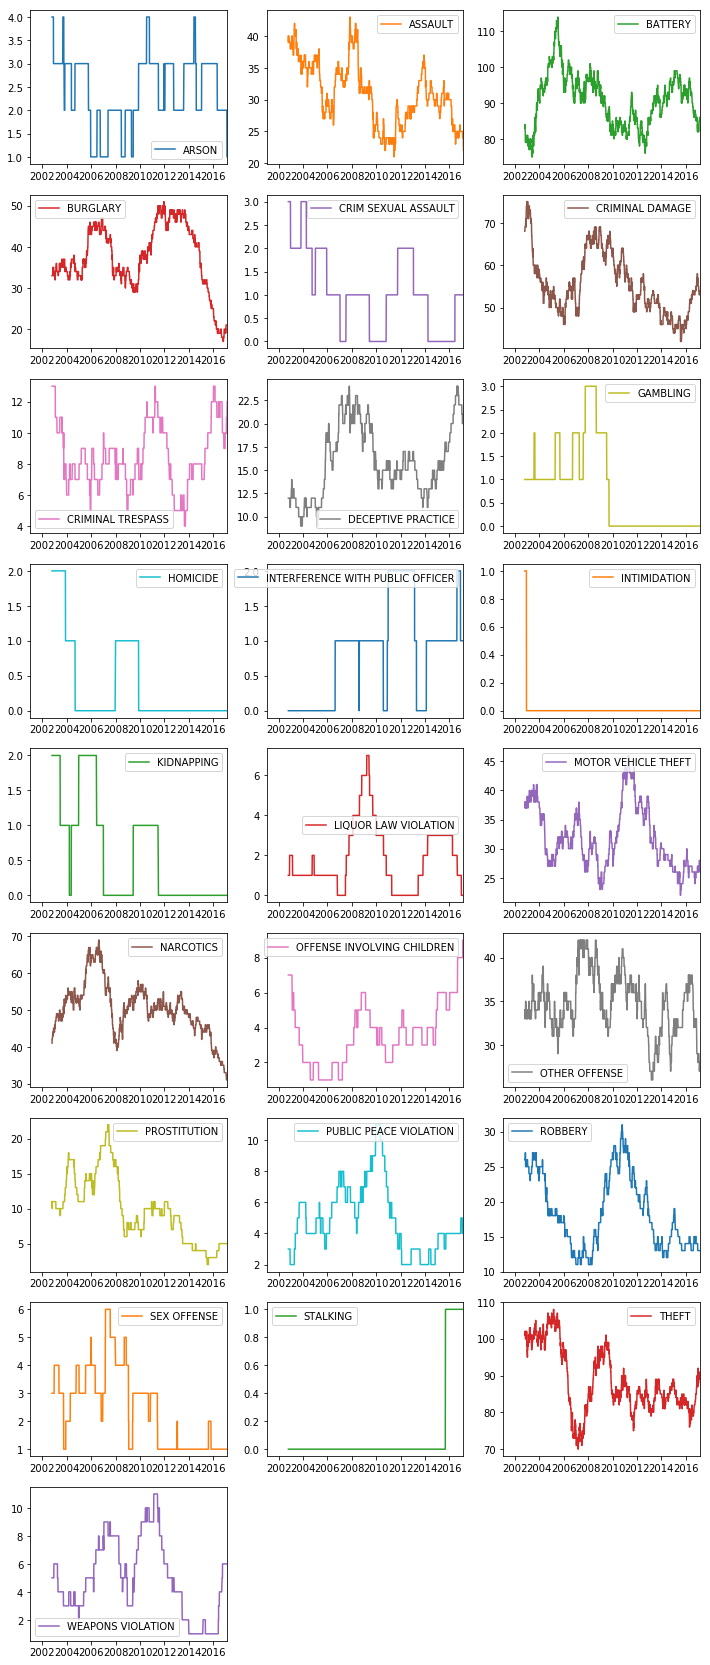

In [427]:
#### DISTRICT 25

dist25.index = pd.DatetimeIndex(dist25.Date)


crimes_count_date = dist25.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=dist25.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)



In [ ]:
yearDict2 = {}
a2 = []   
for y in range(2001,2017):
    mask1 = data[data['Year'] == y]
    arrest = mask1['Primary Type'].count()
    a.append(arrest)
    ar = []
    for d in range(1,26):
        mask2 = mask1[mask1['District'] == d]
        count= mask2['Primary Type'].count()
        fraction = float(count)/(a[y-2001])
        ar.append(fraction)
    yearDict2[y]= ar

df_year2 = pd.DataFrame.from_dict(yearDict2, orient='index')
df_year2 = df_year2.sort_index()
df_year2.plot()
df_year2.T
    
 